# Regresión Lineal: Costo de un incidente de seguridad.

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la ciberseguridad

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria. 

# 1.Generación del DataSet

In [1]:
import numpy as np

X= 2* np.random.rand(100,1)

y= 4 + 3 * X + np.random.randn(100,1)

print("la longitud del DataSet es:" ,len(X))

la longitud del DataSet es: 100


# 2. Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

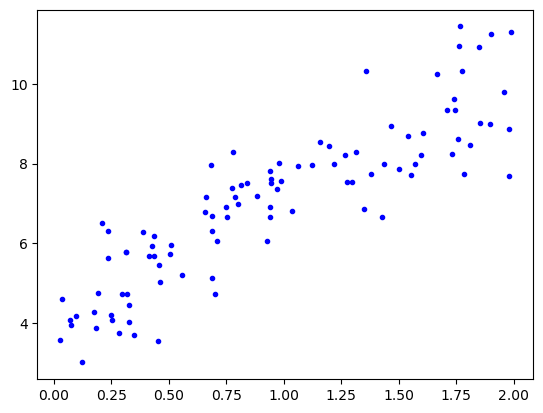

In [3]:
plt.plot (X,y,"b.")
plt.show()

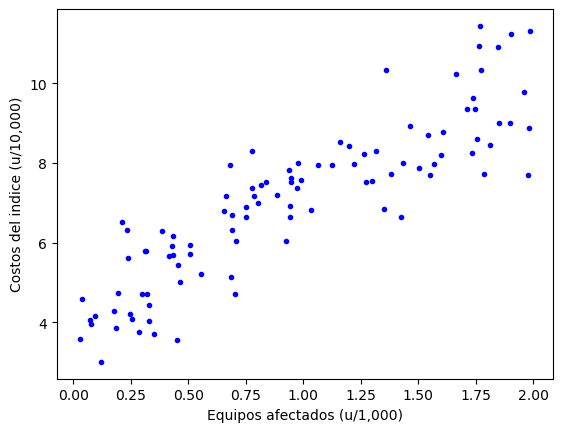

In [4]:
plt.plot (X,y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costos del indice (u/10,000)")
plt.show()

# Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data={'No_Equipos_afectados':X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_afectados,Costo
0,1.381212,7.733501
1,0.942345,6.655909
2,1.712446,9.356582
3,0.945372,7.619836
4,1.569546,7.985482
5,1.732761,8.245324
6,0.095516,4.166134
7,1.264824,8.223525
8,0.708881,6.053360
9,0.787062,7.171310


In [7]:
# Escalado del número de equipos afectados 
df['No_Equipos_afectados']= df['No_Equipos_afectados']*1000
df['No_Equipos_afectados']= df['No_Equipos_afectados'].astype('int')
# Escalado del costo
df['Costo']=df['Costo']*10000
df['Costo']=df['Costo'].astype('int')
df.head(10)

,No_Equipos_afectados,Costo
0,1381,77335
1,942,66559
2,1712,93565
3,945,76198
4,1569,79854
5,1732,82453
6,95,41661
7,1264,82235
8,708,60533
9,787,71713


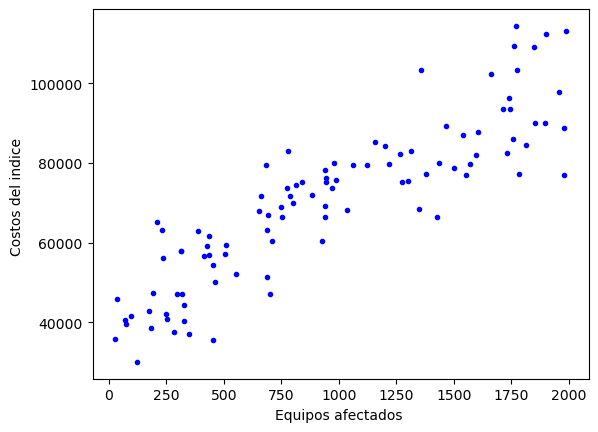

In [8]:
plt.plot (df['No_Equipos_afectados'],df['Costo'],"b.")
plt.xlabel("Equipos afectados ")
plt.ylabel("Costos del indice ")
plt.show()

# 4. Construcción del Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
# Construcción del modelo y ajuste de la función de hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_afectados'].values.reshape(-1, 1),df['Costo'].values)

LinearRegression()

In [12]:
# Parámetro Theta 0 
lin_reg.intercept_

41937.021690119436

In [13]:
# Parámetro Theta 1
lin_reg.coef_

array([29.61944637])

In [20]:
#Predicción para el valor minimo y maximo para el conjunto de datos de entrenamiento 
X_min_max = np.array([[df["No_Equipos_afectados"].min()],[df["No_Equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max )
                

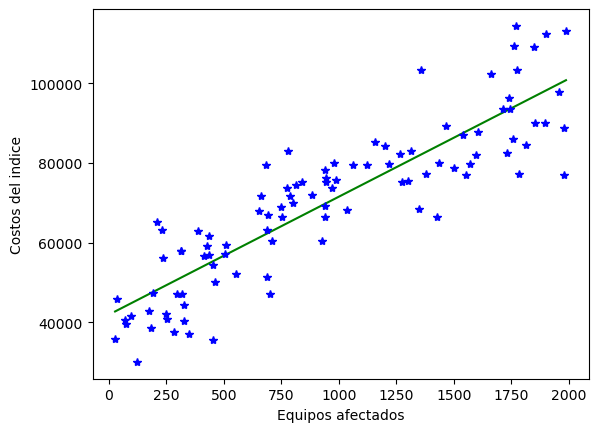

In [22]:
# Representación gráfica de la función de hipótesis generada.
plt.plot(X_min_max , y_train_pred,"g-")
plt.plot (df['No_Equipos_afectados'],df['Costo'],"b*")
plt.xlabel("Equipos afectados")
plt.ylabel("Costos del indice")
plt.show()

# 5. Predicción de nuevos ejemplos

In [35]:
x_new = np.array([[2700]]) # Número de equipos afectados.
# Predicción del costo que tendria el incidente.
Costo = lin_reg.predict(x_new)
print ("El costo del incidente seria: $",int(Costo[0]))

El costo del incidente seria: $ 121909


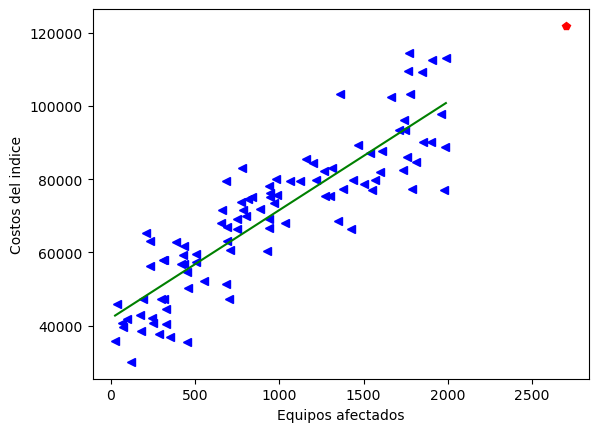

In [36]:
plt.plot (df['No_Equipos_afectados'],df['Costo'],"b<")
plt.plot(X_min_max , y_train_pred,"g-")
plt.plot(x_new,Costo, "rp")
plt.xlabel("Equipos afectados")
plt.ylabel("Costos del indice")
plt.show()